<a href="https://colab.research.google.com/github/Khanyecebani/Tensorflow/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense


In [ ]:
#Load MNIST dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Next, we normalize the image data by dividing by 255 (since pixel values range from 0 to 255), which helps in faster convergence during training.

In [ ]:
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)


Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


To understand the data better, we plot the first 100 training samples, each representing a digit.




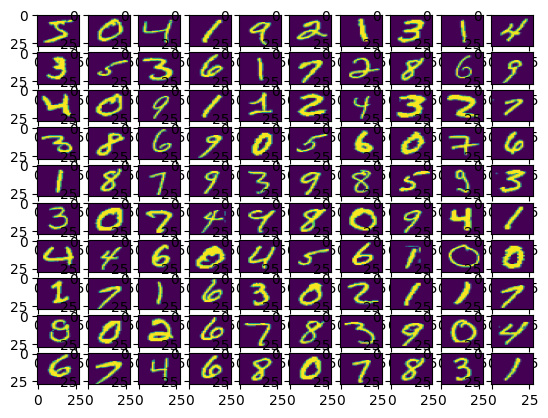

In [ ]:
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()


Here, we build a Sequential neural network model. The model consists of:

Flatten Layer: Reshapes 2D input (28×28 pixels) into a 1D array of 784 elements.

Dense Layers: Fully connected layers with 256 and 128 neurons, both using the relu activation function.

Output Layer: The final layer with 10 neurons representing the 10 classes of digits (0-9) with sigmoid activation.

In [ ]:
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Once the model is defined, we compile it by specifying:

Optimizer: Adam, for efficient weight updates.

Loss Function: Sparse categorical crossentropy, which is suitable for multi-class classification.

Metrics: Accuracy, to evaluate model performance.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


We train the model on the training data using 10 epochs and a batch size of 2000.

We also use 20% of the training data for validation to monitor the model’s performance on unseen data during training.

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9245 - loss: 0.2709 - val_accuracy: 0.9295 - val_loss: 0.2550
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9262 - loss: 0.2612 - val_accuracy: 0.9310 - val_loss: 0.2438
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9292 - loss: 0.2510 - val_accuracy: 0.9331 - val_loss: 0.2344
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9337 - loss: 0.2338 - val_accuracy: 0.9366 - val_loss: 0.2256
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9355 - loss: 0.2263 - val_accuracy: 0.9386 - val_loss: 0.2171
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9383 - loss: 0.2157 - val_accuracy: 0.9417 - val_loss: 0.2091
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9400 - loss: 0.2061 - val_accuracy: 0.9435 - val_loss: 0.2020
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9433 - loss: 0.1938 - val_accuracy: 0.9456 - v

After training, we evaluate the model on the test dataset to determine its performance.






In [ ]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)


Test loss, Test accuracy: [0.18536926805973053, 0.9459999799728394]


In [ ]:
# Visualization of Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

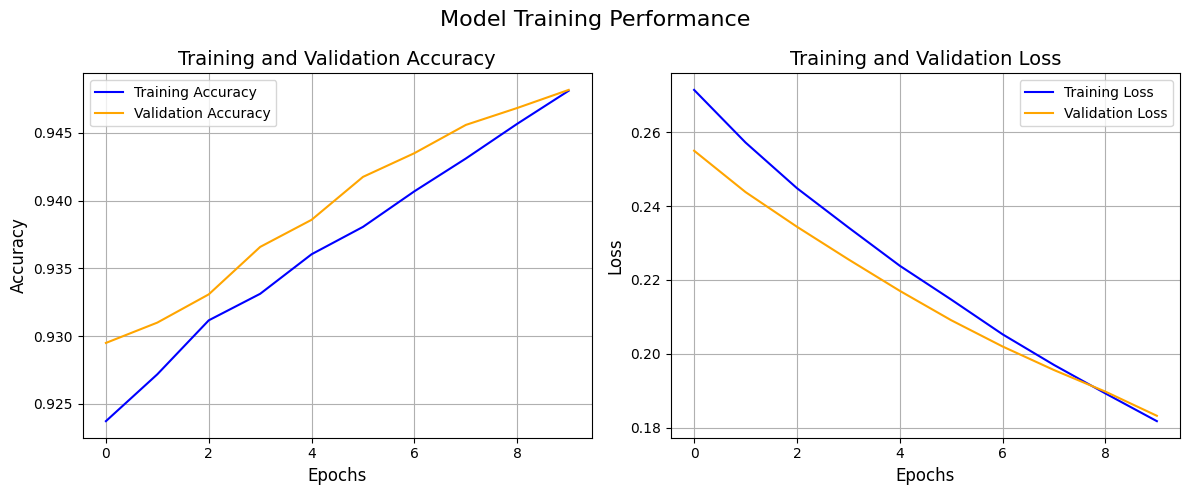

In [ ]:
# Visualization of Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()
